# **WHO PROJECT** 
### by Hena Naeem, Bekim Gerguri,  Ginny Rendall, Ewen Henderson

<p style="text-align:right;">
<img src="https://images.unsplash.com/photo-1614526261628-295d39158f96?ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&q=80&w=1470"
     width="350" height="350" style="float: right; margin-right: 0px;" />
</p>

## 'Prediction of life expectancies across countries.'
<b>Summary

This analysis explores factors influencing life expectancy 
across countries to build a predictive model that can help 
WHO prioritize health interventions.

Section 1: This file holds:
- EDA, Feature Engineering and Models

Section 2: This function file holds:
- Functions and Demo

# Section 1

# Importing Libraries

In [42]:
# Importing libraries

# Importing the following libraries for data maninpulation and mathmatical operations
import pandas as pd 
import numpy as np

# Importing the following libraries for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the following libraries for statistical analysis
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.tools
from sklearn.preprocessing import RobustScaler
from scipy.stats import zscore

# EDA

In [43]:
# Load the dataset from a CSV file into a DataFrame
df = pd.read_csv('Life Expectancy Data.csv')

In [44]:
# Display first 5 rows of the DataFrame
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [45]:
# Number of rows & columns in the data
df.shape

(2864, 21)

In [46]:
# Number of null values in the dataset by column
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [47]:
# Summary statistics of the data
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


In [48]:
# Check the data types of each column in the dataset
df.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

In [49]:
# Get all unique values in the 'Region' column
df.Region.unique()

array(['Middle East', 'European Union', 'Asia', 'South America',
       'Central America and Caribbean', 'Rest of Europe', 'Africa',
       'Oceania', 'North America'], dtype=object)

In [50]:
# Count the number of unique countries
len(df.Country.unique())

179

**Data Overview**

* Dataset: 2,864 rows, 21 columns
* Time Period: 2000-2015
* Countries: 179 across 9 regions
* No null-values & 0 values


# Graphs

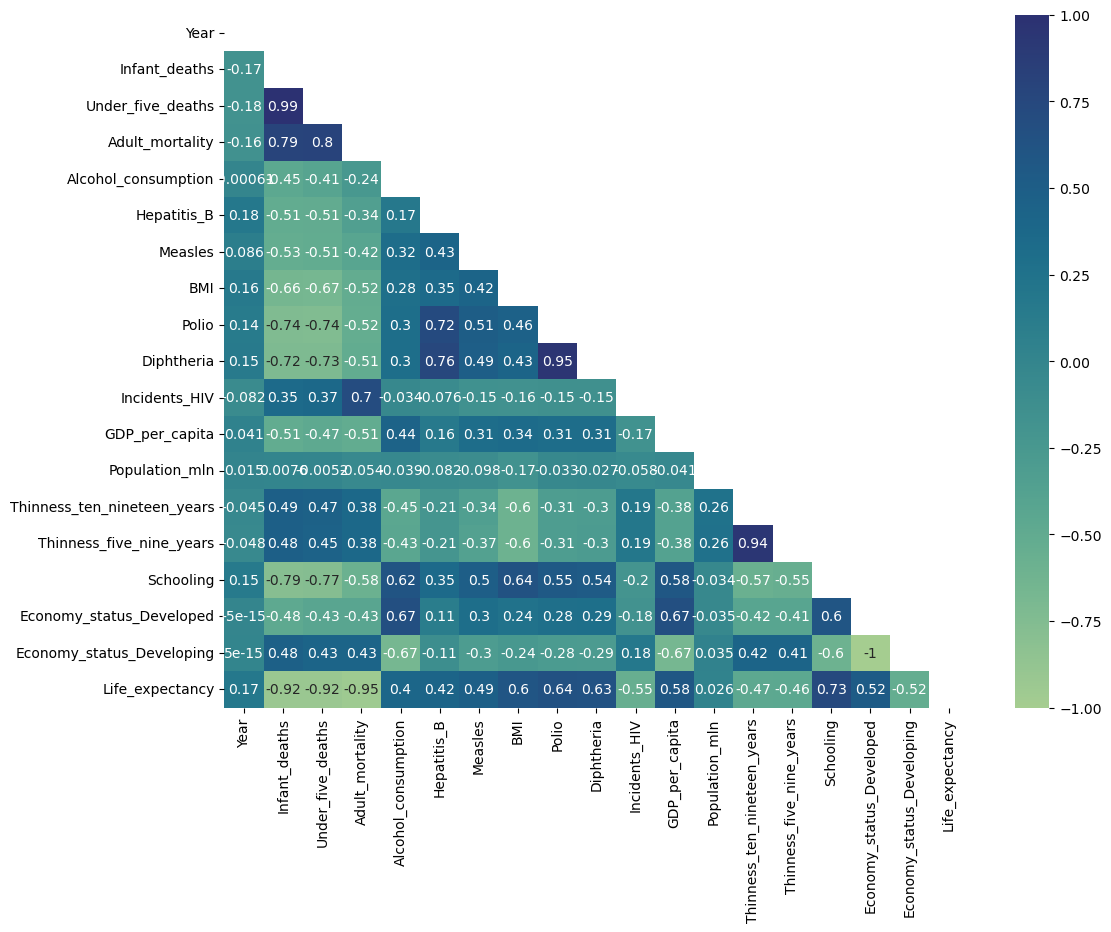

In [51]:
# Heatmap of correlations between columns
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(numeric_only = True),
           mask = np.triu(df.corr(numeric_only = True)),
           annot = True,
           vmin = -1,
           vmax = 1,
           cmap = 'crest');

**Heatmap Findings**
* Strong correlation between vaccination rates (Hepatitis B, Polio, Diphtheria)
* Infant_deaths has a strong positive correlation (0.99) with Under_five_deaths
* Thinness_ten_nineteen_years has a strong positive correlation (0.94) with five_nine_years
* Economy_status_developed has exactly a correlation of -1 with Economy_status_developing

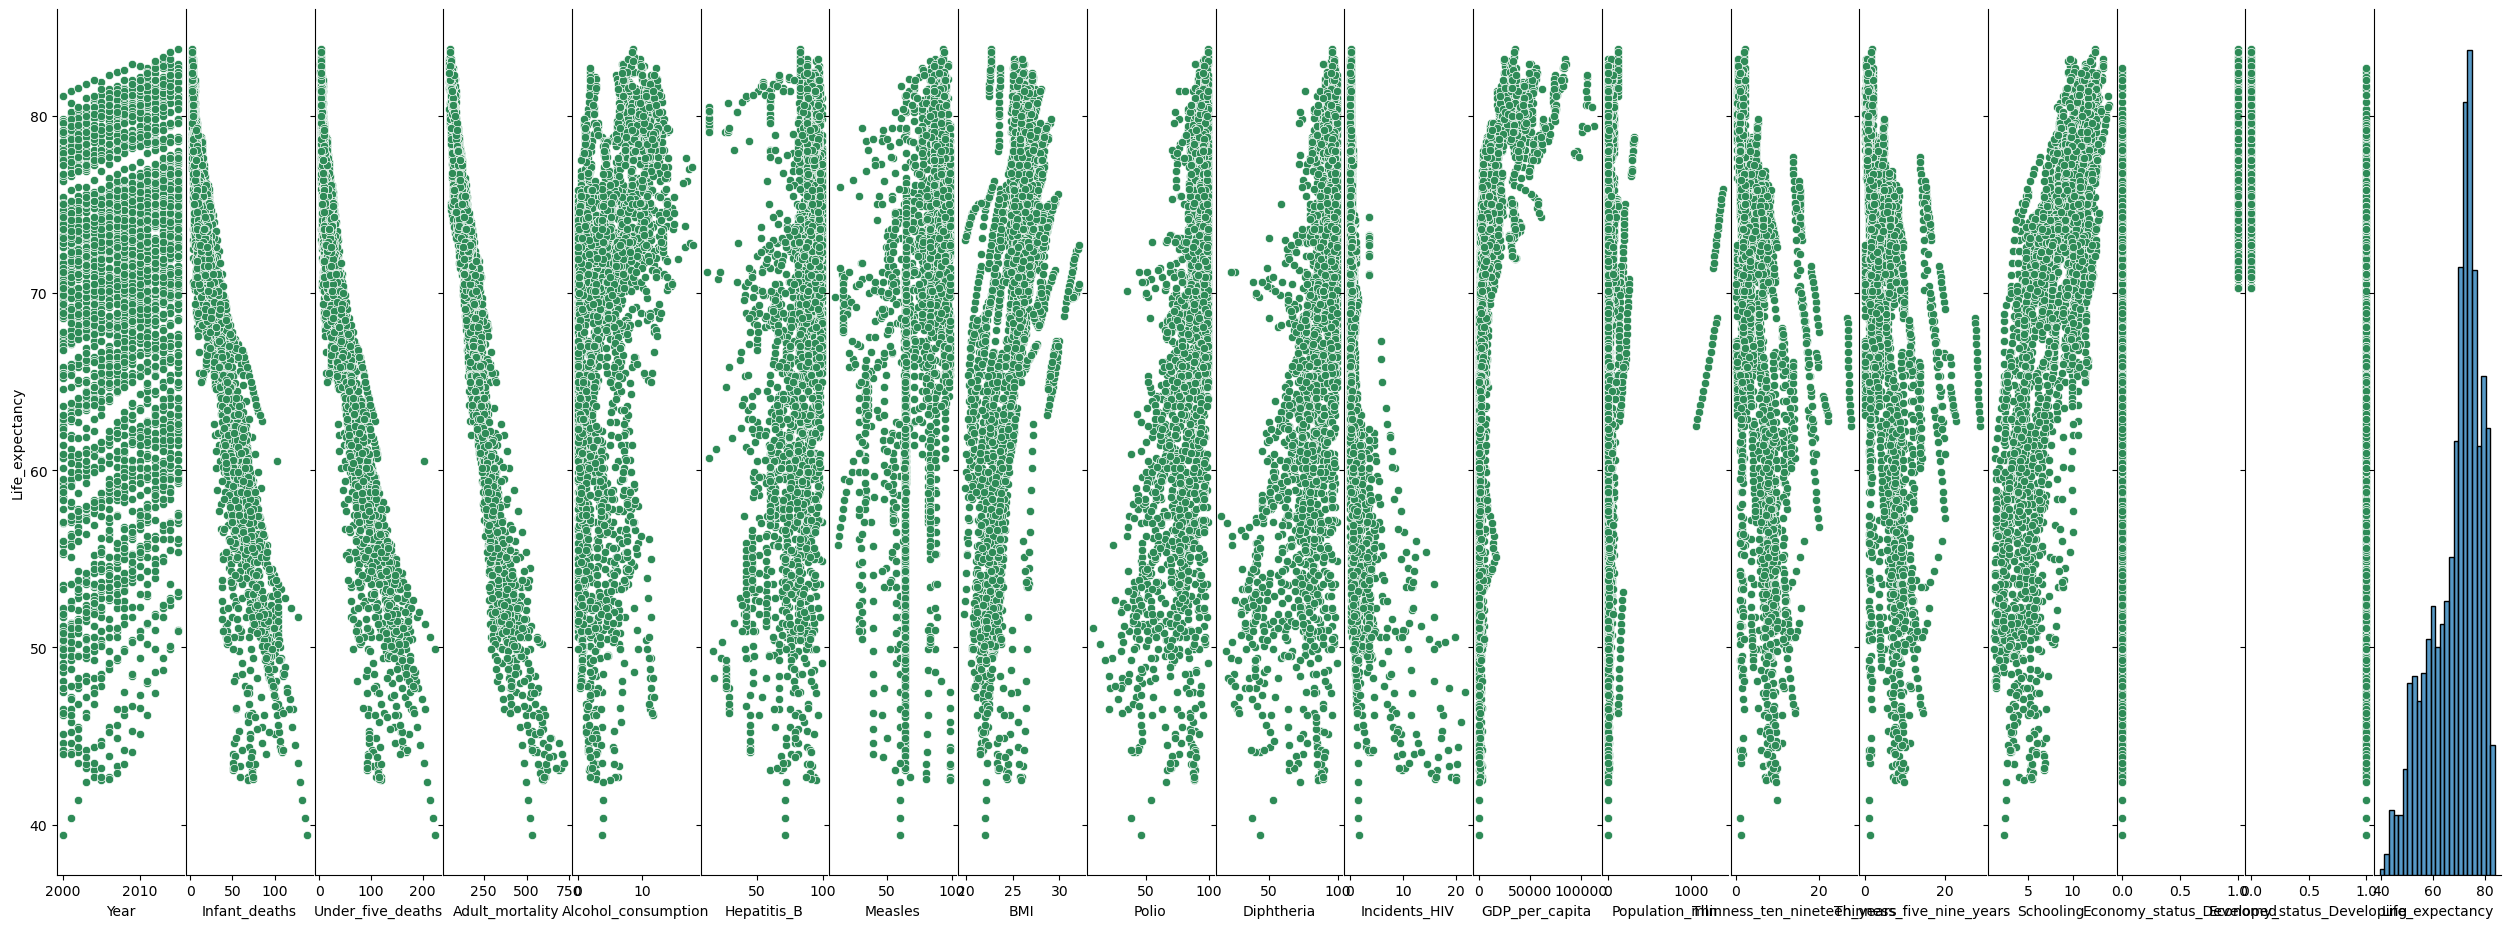

In [52]:
sns.pairplot(df, y_vars=['Life_expectancy'], height=5, aspect=2.5, plot_kws={'color': 'seagreen'})
plt.gcf().set_size_inches(25, 10)
plt.show()

# Feature Engineering

**Dropping outliers**
- Rows dropped with zscores greater than 3 in 4 or more columns.

In [54]:
z_scores = zscore(df.drop(columns = ['Country', 'Region']))
outlier_counts = (np.abs(z_scores) > 3).sum(axis=1)
outliers = df[outlier_counts >= 4]

df_out = df.copy()
df_out = df.drop(index = outliers.index) # Dropping all outliers by index

**Dropping columns**

After checking the dataset for multicollinearity (via the heatmap), and some columns having high p-values in previous iterations of our model, the following columns are dropped:
* Country
* Year
* Measles
* Polio
* Hepatitis_B
* Diphtheria
* Population_mln
* Alcohol_consumption
* Infant_deaths
* Thinness_five_nine_years
* Economy_status_Developing

In [55]:
df_out.drop(columns = ['Measles', 'Polio', 'Hepatitis_B', 'Diphtheria', 'Population_mln', 
                       'Alcohol_consumption', 'Infant_deaths', 'Thinness_five_nine_years', 
                       'Economy_status_Developing', 'Country', 'Year'], inplace = True)

<B>OHE
- Region column is then one hot encoded to ensure all columns within the model are numeric

In [56]:
df_out = pd.get_dummies(df_out, columns = ['Region'], drop_first = True, dtype = int)

**Log scale**
- A log scale is applied to both GDP_per_capita & BMI columns, due to a lack of a linear relationship to the target column

In [57]:
df_out['log_GDP'] = np.log(df_out.GDP_per_capita) # Apply log scale to GDP_per_capita
df_out['log_BMI'] = np.log(df_out.BMI) # Apply log scale to BMI

df_out.drop(columns = ['GDP_per_capita', 'BMI'], inplace = True) # Dropping the original columns

X_log_out = df_out.drop(columns = ['Life_expectancy'])
y_log_out = df_out.Life_expectancy                    

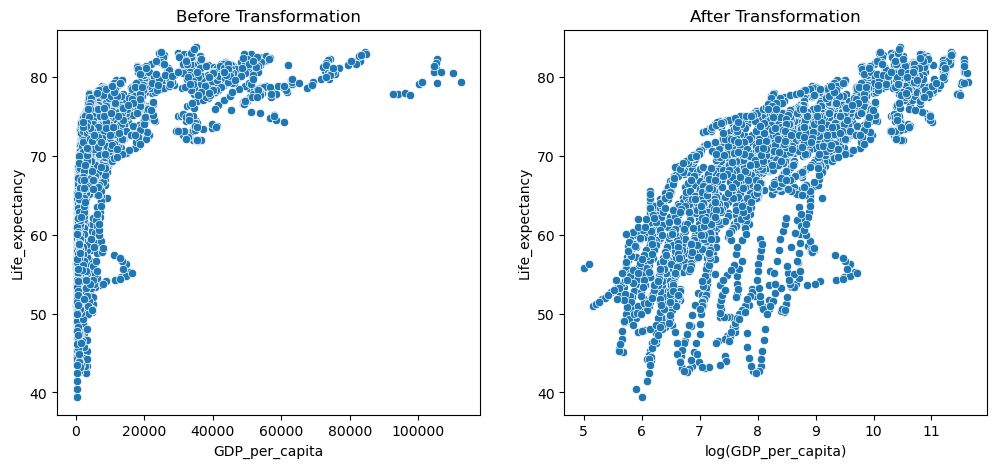

In [58]:
plt.figure(figsize = (12,5))

# Scatterplot of correlation between GDP_per_capita and Life_expectancy before a log scale is applied
plt.subplot(1,2,1)
sns.scatterplot(x = df.GDP_per_capita, y = df.Life_expectancy)
plt.title("Before Transformation")

# Scatterplot of correlation between GDP_per_capita and Life_expectancy after a log scale is applied
plt.subplot(1,2,2)
sns.scatterplot(x = np.log(df.GDP_per_capita), y = df.Life_expectancy)
plt.xlabel("log(GDP_per_capita)")
plt.title("After Transformation")

plt.show()

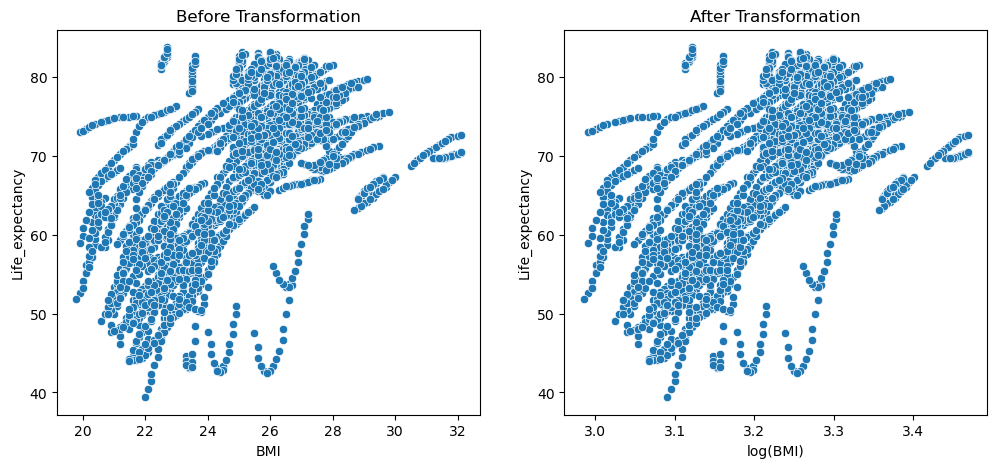

In [59]:
plt.figure(figsize = (12,5))

# Scatterplot of correlation between BMI and Life_expectancy before a log scale is applied
plt.subplot(1,2,1)
sns.scatterplot(x = df.BMI, y = df.Life_expectancy)
plt.title("Before Transformation")

# Scatterplot of correlation between BMI and Life_expectancy after a log scale is applied
plt.subplot(1,2,2)
sns.scatterplot(x = np.log(df.BMI), y = df.Life_expectancy)
plt.xlabel("log(BMI)")
plt.title("After Transformation")

plt.show()

# Models

## Maximal Model

**Data Scaling**
* Applied RobustScaler to the data, in order to ensure all features are on a similar scale to each other

In [60]:
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_log_out, y_log_out, test_size = 0.2, random_state = 264) # Train-test split

columns_train_out = X_train_out.columns
index_train_out = X_train_out.index

columns_test_out = X_test_out.columns
index_test_out = X_test_out.index

# Scale the columns
rob_out = RobustScaler()
X_train_out_scaled = rob_out.fit_transform(X_train_out)
X_train_out_scaled = pd.DataFrame(X_train_out_scaled, columns = columns_train_out, index = index_train_out)

X_test_out_scaled = rob_out.transform(X_test_out)
X_test_out_scaled = pd.DataFrame(X_test_out_scaled, columns = columns_test_out, index = index_test_out)

X_train_out_scaled = sm.add_constant(X_train_out_scaled) # Add constant to train data
X_test_out_scaled = sm.add_constant(X_test_out_scaled) # Add constant to test data

In [61]:
model5 = sm.OLS(y_train_out, X_train_out_scaled) # Creating OLS model
result5 = model5.fit() # Fit model to the data
result5.summary() # Display results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     8261.
Date:                Mon, 27 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:56:27   Log-Likelihood:                -3702.0
No. Observations:                2282   AIC:                             7438.
Df Residuals:                    2265   BIC:                             7536.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   70.9832      0.087    811.459      0.000      70.812      71.155
Under_five_deaths                       -4.3401      0.084    -51.766      0.000      -4.505      -4.176
Adult_mortality                         -6.5856      0.089    -74.286      0.000      -6.759      -6.412
Incidents_HIV                            0.0246      0.007      3.580      0.000       0.011       0.038
Thinness_ten_nineteen_years             -0.1066      0.049     -2.181      0.029      -0.202      -0.011
Schooling                                0.6026      0.098      6.127      0.000       0.410       0.795
Economy_status_Developed                 2.6243      0.162     16.247      0.000       2.308       2.941
Region_Asia                              0.1498      0.109      1.378      0.168      -0.063       0.363
Region_Central America and Caribbean     1.7821      0.118     15.118      0.000       1.551       2.013
Region_European Union                   -0.8714      0.173     -5.036      0.000      -1.211      -0.532
Region_Middle East                       0.1340      0.136      0.987      0.324      -0.132       0.400
Region_North America                     0.4688      0.239      1.958      0.050      -0.001       0.938
Region_Oceania                          -1.0020      0.141     -7.116      0.000      -1.278      -0.726
Region_Rest of Europe                    0.2454      0.141      1.742      0.082      -0.031       0.522
Region_South America                     1.4635      0.137     10.655      0.000       1.194       1.733
log_GDP                                  0.8927      0.091      9.863      0.000       0.715       1.070
log_BMI                                 -0.5620      0.073     -7.706      0.000      -0.705      -0.419
==============================================================================
Omnibus:                       27.117   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.762
Skew:                           0.160   Prob(JB):                     1.72e-08
Kurtosis:                       3.524   Cond. No.                         87.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
y_pred_out = result5.fittedvalues

In [63]:
# Calculate and display RMSE on train data
rmse5 = sm.tools.eval_measures.rmse(y_train_out, y_pred_out)
rmse5

np.float64(1.225488465488961)

In [64]:
y_test_pred_out = result5.predict(X_test_out_scaled)

In [65]:
# Calculate and display RMSE on test data
rmse_out5 = sm.tools.eval_measures.rmse(y_test_out, y_test_pred_out)
rmse_out5

np.float64(1.1791473814855593)

## Sensitive Friendly Model
* Within this model, our feature columns are: Region, GDP_per_capita, Economy_status_Devloped & Adult_mortality
* A log scale is applied to GDP_per_capita, due to the lack of a linear relationship to the target column
* The region column is then One Hot Encoded

In [66]:
X_m = df[['GDP_per_capita', 'Economy_status_Developed', 'Region','Adult_mortality']].copy() # Feature columns
y_m = df['Life_expectancy'] # Target column

X_m['log_GDP'] = np.log(X_m.GDP_per_capita) # Apply log scale to GDP_per_capita as a new column
X_m.drop(columns = ['GDP_per_capita'], inplace = True) # Drop GDP_per_capita column

X_m = pd.get_dummies(X_m, columns = ['Region'], drop_first = True, dtype = int) # OHE 'Region'

In [67]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size = 0.2, random_state = 264) # Train-test split

columns_train_m = X_train_m.columns
index_train_m = X_train_m.index

columns_test_m = X_test_m.columns
index_test_m = X_test_m.index

# Scale the columns
rob_m = RobustScaler()
X_train_m_scaled = rob_m.fit_transform(X_train_m)
X_train_m_scaled = pd.DataFrame(X_train_m_scaled, columns = columns_train_m, index = index_train_m)

X_test_m_scaled = rob_m.transform(X_test_m)
X_test_m_scaled = pd.DataFrame(X_test_m_scaled, columns = columns_test_m, index = index_test_m)

X_train_m_scaled = sm.add_constant(X_train_m_scaled) # Add constant to train data
X_test_m_scaled = sm.add_constant(X_test_m_scaled) # Add constant to test data

In [68]:
lm = sm.OLS(y_train_m, X_train_m_scaled) # Creating OLS model
res = lm.fit() # Fit model to the data
res.summary() # Display results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     4013.
Date:                Mon, 27 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:56:27   Log-Likelihood:                -4910.2
No. Observations:                2291   AIC:                             9844.
Df Residuals:                    2279   BIC:                             9913.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   68.4034      0.121    567.484      0.000      68.167      68.640
Economy_status_Developed                 0.9939      0.243      4.089      0.000       0.517       1.470
Adult_mortality                         -7.7582      0.084    -92.288      0.000      -7.923      -7.593
log_GDP                                  3.2339      0.111     29.047      0.000       3.016       3.452
Region_Asia                              2.2500      0.158     14.281      0.000       1.941       2.559
Region_Central America and Caribbean     3.5619      0.183     19.449      0.000       3.203       3.921
Region_European Union                    2.4314      0.264      9.217      0.000       1.914       2.949
Region_Middle East                       1.1362      0.218      5.219      0.000       0.709       1.563
Region_North America                     2.4785      0.388      6.390      0.000       1.718       3.239
Region_Oceania                           0.9069      0.207      4.382      0.000       0.501       1.313
Region_Rest of Europe                    3.5465      0.198     17.929      0.000       3.159       3.934
Region_South America                     3.2380      0.212     15.254      0.000       2.822       3.654
==============================================================================
Omnibus:                      150.163   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.928
Skew:                          -0.472   Prob(JB):                     1.21e-60
Kurtosis:                       4.414   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
y_pred_m = res.fittedvalues

In [70]:
# Calculate and display RMSE on train data
rmse6 = sm.tools.eval_measures.rmse(y_train_m, y_pred_m)
rmse6

np.float64(2.063360631828425)

In [71]:
y_test_pred_m = res.predict(X_test_m_scaled)

In [72]:
# Calculate and display RMSE on test data
rmse_m6 = sm.tools.eval_measures.rmse(y_test_m, y_test_pred_m)
rmse_m6

np.float64(2.04688177296407)

## Key Features at a Glance

|Feature            | Max Model          | Min Model         | Benefit to WHO |
|---------          |-----------         |-----------        |----------------|
| Accuracy          | RMSE 1.18          | RMSE 2.07         | Better decision making |
| Data Points       | 8 inputs           | 4 inputs          | Flexible privacy options |
| Regional Analysis | Included           | Included          | Localized insights |
| Ethical Compliance| Advanced consent   | Privacy first     | Regulatory ready |

## Why Choose Our Model?

### Our 'Sensitive Friendly Model':
* Has an RMSE 2.07 which gives a fairly accurate prediction without compromising private information
* Is built for WHO's strict privacy standards
* Can perform predictions for privacy-sensitive regions

### Our 'Max Model':
* Has an RMSE of 1.18, which is a 34% reduction from 1.80
* Optimised for policy planning
* Resource allocation
* Impact evaluation

### Both Models
* Support reproducibility
* Audience safety
* Ethical framing, with reusable validation
* Standardised thank-you message
